# Advertising Sale Channel Prediction

Sales Channel Prediction Case Study 

# Exploratory Data Analysis

In [57]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [58]:
pd.set_option('display.max_rows',None)

In [59]:
df=pd.read_csv('Advertising_Sales_Channel_Prediction.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [60]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [61]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [63]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Graphical Representation

<AxesSubplot:xlabel='TV', ylabel='Density'>

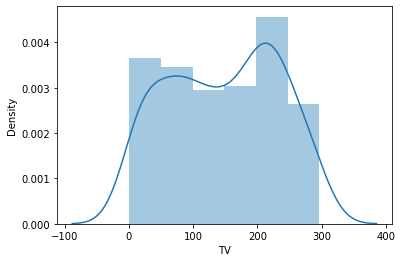

In [64]:
sns.distplot(df['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Density'>

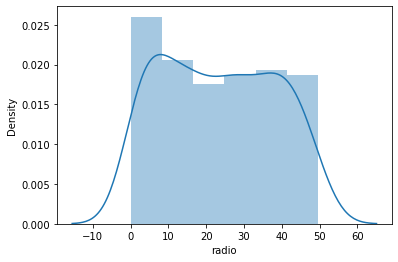

In [65]:
sns.distplot(df['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

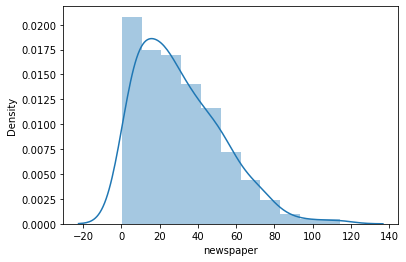

In [66]:
sns.distplot(df['newspaper'],kde=True)

<AxesSubplot:xlabel='sales', ylabel='Density'>

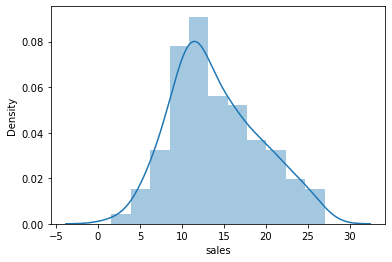

In [67]:
sns.distplot(df['sales'],kde=True)

In [68]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

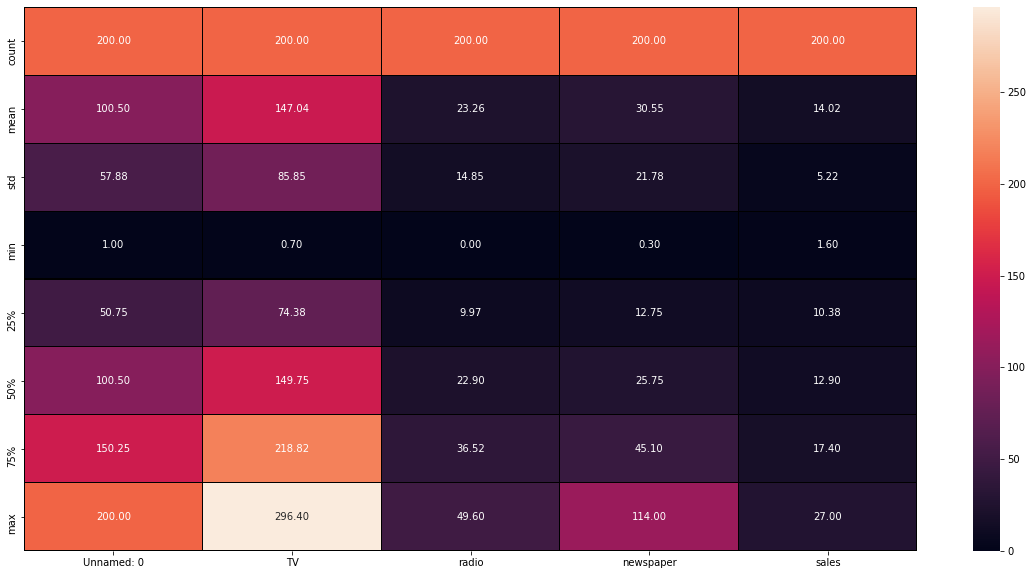

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [70]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

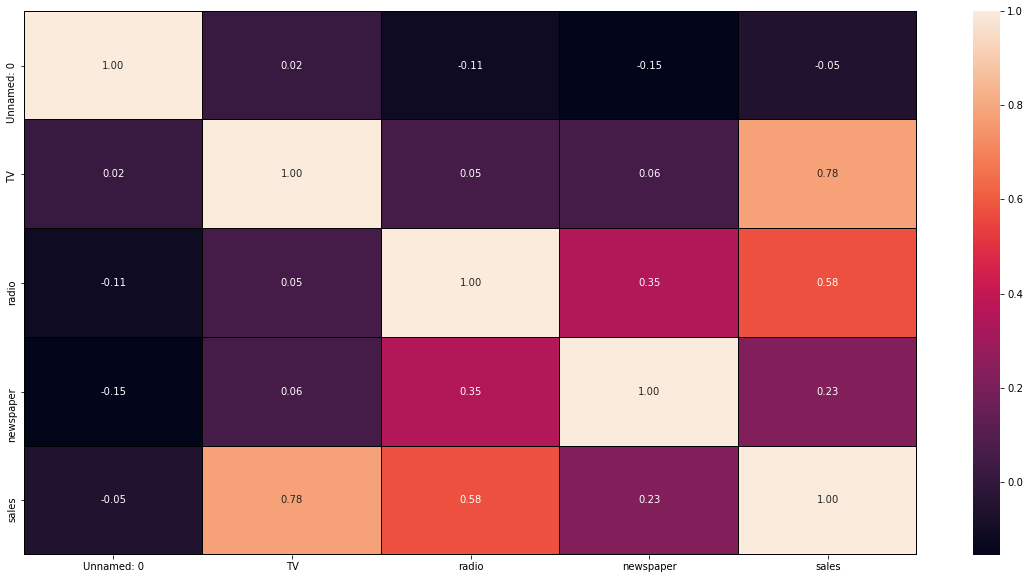

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are postively and negatively correlated with the target columns

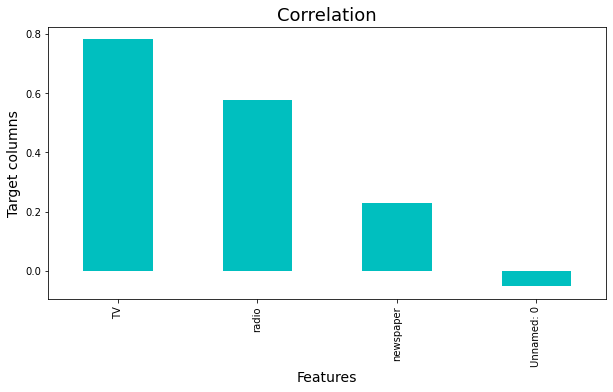

In [72]:
plt.figure(figsize=(10,5))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target columns',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [73]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

# To Check Outliers

In [74]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

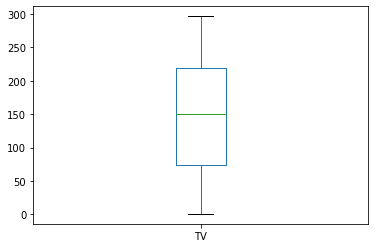

In [75]:
df['TV'].plot.box()

<AxesSubplot:>

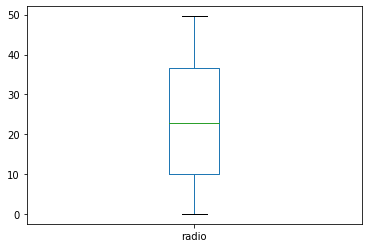

In [76]:
df['radio'].plot.box()

<AxesSubplot:>

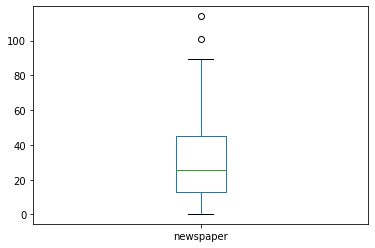

In [77]:
df['newspaper'].plot.box()

 We have found outliers in newspaper.

# Removal of Outliers.                                                       

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [79]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [80]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [81]:
df.shape

(200, 5)

In [82]:
df_new.shape

(198, 5)

In [83]:
Data_loss=((200-198)/200*100)
Data_loss

1.0

Outliers is Removed.

# Separting the Columns into Feature & Target

In [84]:
x=df.drop('sales',axis=1)
y=df['sales']

In [85]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [86]:
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9073274552252846
At random state 0,the testing accuracy is:0.8564802143279248


At random state 1,the training accuracy is:0.8959391993971187
At random state 1,the testing accuracy is:0.8928781912093181


At random state 2,the training accuracy is:0.9152614531156524
At random state 2,the testing accuracy is:0.7570326409482366


At random state 3,the training accuracy is:0.8931443451313652
At random state 3,the testing accuracy is:0.9134449674582059


At random state 4,the training accuracy is:0.8911682084041699
At random state 4,the testing accuracy is:0.9084934434517353


At random state 5,the training accuracy is:0.89570620107301
At random state 5,the testing accuracy is:0.89851958363058


At random state 6,the training accuracy is:0.8915582028345674
At random state 6,the testing accuracy is:0.921941222913581


At random state 7,the training accuracy is:0.8929171093102488
At random state 7,the testing accuracy is:0.9094946118605033


At ra

At random state 74,the training accuracy is:0.8980451797105264
At random state 74,the testing accuracy is:0.8802918295913446


At random state 75,the training accuracy is:0.8944097316106918
At random state 75,the testing accuracy is:0.9074740863261651


At random state 76,the training accuracy is:0.9092071576699313
At random state 76,the testing accuracy is:0.7531289748171519


At random state 77,the training accuracy is:0.8859821552154191
At random state 77,the testing accuracy is:0.937956975915543


At random state 78,the training accuracy is:0.8957614044756782
At random state 78,the testing accuracy is:0.9027962436962178


At random state 79,the training accuracy is:0.8918809749821501
At random state 79,the testing accuracy is:0.9039590138288892


At random state 80,the training accuracy is:0.9169729628077916
At random state 80,the testing accuracy is:0.8002879936768355


At random state 81,the training accuracy is:0.9035712487248864
At random state 81,the testing accuracy is:0.8609

At random state 159,the training accuracy is:0.8902746643724242
At random state 159,the testing accuracy is:0.9120147295100955


At random state 160,the training accuracy is:0.8984844410696912
At random state 160,the testing accuracy is:0.8803574453164791


At random state 161,the training accuracy is:0.8908088785272071
At random state 161,the testing accuracy is:0.9166839926224004


At random state 162,the training accuracy is:0.9023354162905649
At random state 162,the testing accuracy is:0.8699645939022176


At random state 163,the training accuracy is:0.8999391456590943
At random state 163,the testing accuracy is:0.8770389979095079


At random state 164,the training accuracy is:0.8779759377452452
At random state 164,the testing accuracy is:0.9366595825687132


At random state 165,the training accuracy is:0.9123291331196994
At random state 165,the testing accuracy is:0.8308104977575753


At random state 166,the training accuracy is:0.9065524233588178
At random state 166,the testing a

At random state 236,the training accuracy is:0.9001458834564752
At random state 236,the testing accuracy is:0.8744019166837933


At random state 237,the training accuracy is:0.9045010802051144
At random state 237,the testing accuracy is:0.8535872655298709


At random state 238,the training accuracy is:0.8952760395182295
At random state 238,the testing accuracy is:0.9074237516727093


At random state 239,the training accuracy is:0.8938679882904692
At random state 239,the testing accuracy is:0.9121744677611173


At random state 240,the training accuracy is:0.9216172401255385
At random state 240,the testing accuracy is:0.8164523318346859


At random state 241,the training accuracy is:0.8934483163601631
At random state 241,the testing accuracy is:0.9089367580478829


At random state 242,the training accuracy is:0.898337092085784
At random state 242,the testing accuracy is:0.8862708827366331


At random state 243,the training accuracy is:0.8930355781830346
At random state 243,the testing ac

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

89.28781912093181


In [89]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

89.59391993971188


# Cross Validation of the Model

In [90]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8557808905096393 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.8913539823868294 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.8858779626590164 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.8842777844741692 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.8877823078964706 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.8830284351379022 and accuracy score for training is 0.8959391993971187 and accuracy score  for the 0.8928781912093181


At cross fold(j) the cv score is 0.879505934736525 and accuracy score 

since the number of folds dont have such impact on the accuracy and cv_score . so cv=5 is selected.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

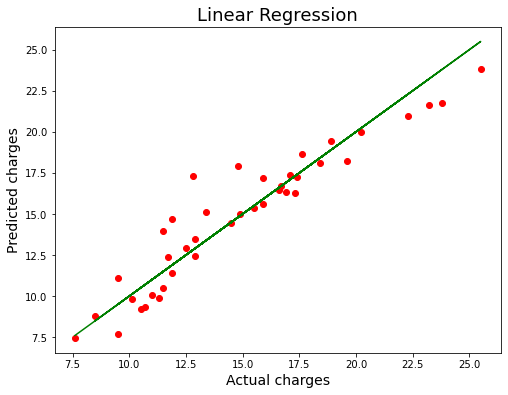

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predict_test,color='r')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [94]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8899669750871062

# Ensemble Technique

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [96]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 97.30574469753228
Cross Val Score: 97.26919123439994


We are getting model accuracy and cross validation both 97% and 97% respectively. hence model performance is Good. 

# Reciever Operating Characteristic(ROC)

In [97]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score 

In [98]:
#Import some data to play with
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [99]:
#Binarize the output
Y=label_binarize(Y,classes=[0,1,2])
n_classes=Y.shape[1]

In [100]:
# Add noisy feautures to make the problem harder
random_state=np.random.RandomState(42)
n_samples,n_features=X.shape
X=np.c_[X,random_state.randn(n_samples,200*n_features)]

In [101]:
#shuffle and so=plit training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.5,random_state=42)

In [102]:
#learn to predict each class against the other
classifier=OneVsRestClassifier(svm.SVC(kernel='linear',probability=True,random_state=random_state))
Y_score=classifier.fit(X_train,Y_train).decision_function(X_test)

In [103]:
# Compute ROC curve and ROC area for each class 
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(Y_test[:,i],Y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

In [104]:
# Compute micro-average ROC curve and ROC area
fpr["micro"],tpr["micro"],_=roc_curve(Y_test.ravel(),Y_score.ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

Plot of ROC curve for a specific class

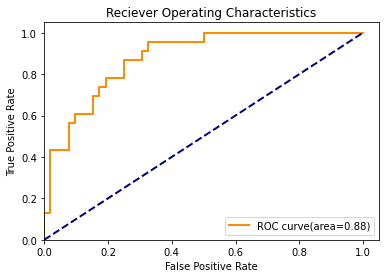

In [105]:
plt.figure()
lw=2
plt.plot(fpr[2],tpr[2],color='darkorange',
        lw=lw,label='ROC curve(area=%0.2f)'%roc_auc[2])
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

In [106]:
Y_prob=classifier.predict_proba(X_test)
macro_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="macro")
weighted_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")
macro_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovr",average="macro")
weighted_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")

In [107]:
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


One-vs-One ROC AUC scores:
0.75030(macro),
0.76386(weighted by prevalance)
One-vs-One ROC AUC scores:
0.75030(macro),
0.76386(weighted by prevalance)


# Saving the Model

In [108]:
import pickle
filename='Advertising Sale Channel Prediction.csv.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [109]:
loaded_model=pickle.load(open('Advertising Sale Channel Prediction.csv.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9730574469753228


In [110]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,23.022,16.063,9.613,13.781,16.141,24.939,17.709,13.867,11.184,16.32,...,22.867,12.104,16.181,12.583,20.25,15.264,11.932,11.268,22.014,6.914
Original,23.022,16.063,9.613,13.781,16.141,24.939,17.709,13.867,11.184,16.32,...,22.867,12.104,16.181,12.583,20.25,15.264,11.932,11.268,22.014,6.914
